# Bayesian Methods for Hackers - Chapter 03 - MCMC

# The Bayesian Landscape

Whenever we set up a Bayesian inference problem involving $N$ unknowns, we're essentially creating an N-dimensional space for the prior distributions to exist in. 

So if we have two parameters $p_1$ and $p_2$ and want to set up a Bayesian inference problem where each of them have a uniform distribution $p_i \sim Uniform(0, 5) \forall {}i \in \{1, 2\}$, then we're essentially setting up a 2-D grid, where the value $f(p_1, p_2)$ is a surface that sits on top of the 2-D grid. 

This surface is a flat square, and represents the prior probability the two parameters $p_1, p_2$ having a particular value. The fact that it is a flat square means that all values of $(p_1, p_2)$ are equally likely.

## Prior Distributions - Uniform

In [17]:
%matplotlib inline 
import scipy.stats as stats
from IPython.core.pylabtools import figsize 
import numpy as np 
figsize(12.5, 4)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, 'Uniform Prior Landscape - Alternate View')

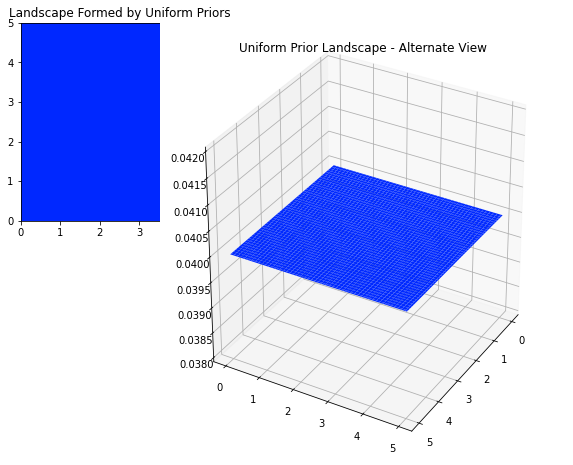

In [18]:
# Defining a color map to use for the 2D surface - warmer colours = higher values
jet = plt.cm.jet 

fig = plt.figure(figsize =(16, 8)) 

# 100 linearly spaced values between 0 and 5 for both x and y
x = y = np.linspace(0, 5, 100)

# A grid of all combinations of x and y
X, Y = np.meshgrid(x, y)

# The first plot is 5 x 5 grid showing the flat square that makes up the prior
plt.subplot(211)
uni_x = stats.uniform.pdf(x, loc = 0, scale = 5)
uni_y = stats.uniform.pdf(y, loc = 0, scale = 5)

M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation = 'none', origin = 'lower', 
                cmap = jet, vmax = 1, vmin = -0.15, extent = (0, 5, 0, 5))

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Landscape Formed by Uniform Priors')

# The second plot shows the prior in 3D
ax = fig.add_subplot(122, projection = '3d')
ax.plot_surface(X, Y, M, cmap = plt.cm.jet, vmax = 1, vmin = -0.15)
ax.view_init(azim = 390)
plt.grid()
plt.title('Uniform Prior Landscape - Alternate View')

## Prior Disrtributions - Exponential 

Alternatively, if the priors were $Exp(3)$ and $Exp(10)$ then the prior's 2-D space will be made up of positive numbers in the 2D plane. Surface created by these priors will look like a waterfall that starts at $(0, 0)$.

Text(0.5, 0.92, '$Exp(3), Exp(10)$ prior landscape  - alternate view')

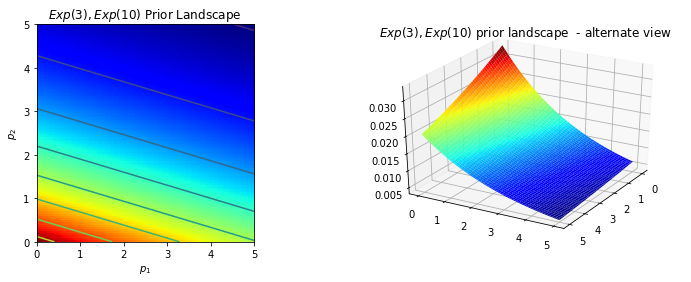

In [19]:
figsize = (12.5, 5)
fig = plt.figure()
plt.subplot(121)

exp_x = stats.expon.pdf(x, scale = 3)         # param_x ~ Exp(3)
exp_y = stats.expon.pdf(x, scale = 10)        # param_y ~ Exp(10)
M = np.dot(exp_x[:, None], exp_y[None, :])
CS = plt.contour(X, Y, M)
im = plt.imshow(M, interpolation = 'none', origin = 'lower', cmap = plt.cm.jet,
                extent = (0, 5, 0, 5))
plt.xlabel('$p_1$')
plt.ylabel('$p_2$')
plt.title('$Exp(3), Exp(10)$ Prior Landscape')

ax = fig.add_subplot(122, projection = '3d')
ax.plot_surface(X, Y, M, cmap = plt.cm.jet)
ax.view_init(azim = 390)
plt.title('$Exp(3), Exp(10)$ prior landscape  - alternate view')

The closer the color is to dark red, the higher the posterior probability of the join prior posterior distribution created by $Exp(3)$ and $Exp(10)$.

## Adding Observations 
Adding observations does not change the prior space: we're still working in an $N$ dimensional space parameterized by $N$ prior parameters. However, the addition of observations can skew and shift the plane of the prior probability distribution, making probabilities higher in some regions and lower in others.

When we have a lot of data, we apply a lot of transformations to the surface made by the priors. With very little data, we apply only limited transformations to the prior joint probability distribution, and the new surface looks a lot like the original surface. 

Regardless, the new surface is the **posterior distribution**. 

The lower the prior probability in a region, the higher the **resistance** to a signficant change in the posterior in the same region. In case of the double exponential priors above, we could see a lot of new peaks in probability near $(0, 0)$ since the prior is already very high there. But fewer peaks near $(5, 5)$.

**The peaks in the posterior distribution show the probability of where the "true" parameters are likley to be found**. 

## Poisson Posteriors
So far we've defined two joint prior distributions: uniform and exponential. Assume that these distributions are actually the prior distributions for two parameters $\lambda$ of two different Poission distributions. 

So we have one Poisson distribution where $$\lambda_1 \sim Uniform(0, 5) \times Uniform (0, 5)$$ and another Poisson distribution where $$\lambda_2 \sim Exp(3) \times Exp(10)$$

We observe a few data points and then visualize the posterior landscape for each $\lambda$.

In [20]:
# Sample size of the data we observe - we can keep varying this (1 - 100)
N = 1

# The "true" values of the lambda_1 and lambda_2. We assume that we don't know these. 
lambda_1_true = 1
lambda_2_true = 3

# We generate our data based on the the true parameter values that we don't know 
# We're essentially drawing N values from two poisson distributions and concatenating them along the columns dimension
data = np.concatenate([
                       stats.poisson.rvs(lambda_1_true, size = (N, 1)), 
                       stats.poisson.rvs(lambda_2_true, size = (N, 1))
], axis = 1)

print(f"Observed 2D sample size: {N}\n {data}")

# 100 linearly spaced values between 0.01 and 5
x = y = np.linspace(0.01, 5, 100)

# Likelihood is the poisson probability distribution along the x and y axes
likelihood_x = np.array([stats.poisson.pmf(data[:, 0], _x) for _x in x]).prod(axis = 1)
likelihood_y = np.array([stats.poisson.pmf(data[:, 1], _y) for _y in y]).prod(axis = 1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

Observed 2D sample size: 1
 [[1 1]]


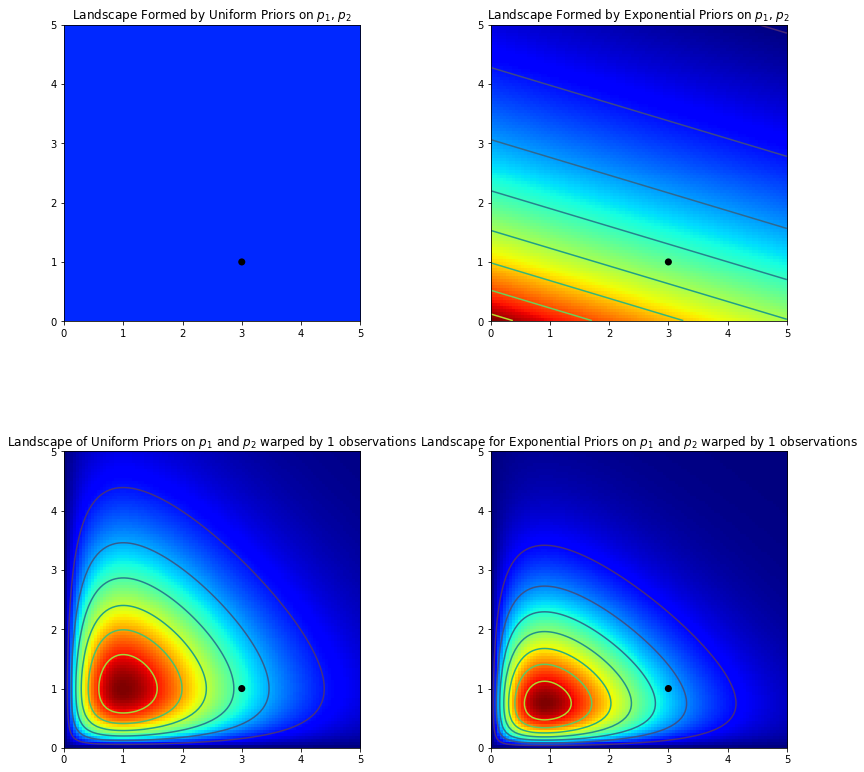

In [21]:
plt.figure(figsize = (12, 12))

# PLOT 01 - Uniform priors in 2D
plt.subplot(221)
uni_x = stats.uniform.pdf(x, loc = 0, scale = 5)
uni_y = stats.uniform.pdf(x, loc = 0, scale = 5)

M = np.dot(uni_x[:, None], uni_y[None, :])
im = plt.imshow(M, interpolation = 'none', origin = 'lower', cmap = plt.cm.jet, 
                vmax = 1, vmin = -0.15, extent = (0, 5, 0, 5))
plt.xlim(0, 5)
plt.ylim(0, 5)

# Adding the lambda values to the same plot
plt.scatter(lambda_2_true, lambda_1_true, c = 'k', s = 50, edgecolor = 'none')

plt.title('Landscape Formed by Uniform Priors on $p_1$, $p_2$')

# PLOT 02 - UNIFORM POSTERIOR WARPED BY LAMBDA 
plt.subplot(223)
plt.contour(x, y, M * L)        # L is the likelihood, M is the uniform prior 
im = plt.imshow(M * L, interpolation = 'none', origin = 'lower', cmap = plt.cm.jet, 
                extent = (0, 5, 0, 5))
plt.title(f'Landscape of Uniform Priors on $p_1$ and $p_2$ warped by {N} observations')
plt.scatter(lambda_2_true, lambda_1_true, c = 'k', s = 50, edgecolor = 'none') 
plt.xlim(0, 5)
plt.ylim(0, 5)

# PLOT 03 - exponential priors in 2D
plt.subplot(222)
exp_x = stats.expon.pdf(x, loc = 0, scale = 3)
exp_y = stats.expon.pdf(y, loc = 0, scale = 10)
M = np.dot(exp_x[:, None], exp_y[None, :])

plt.contour(x, y, M)
im = plt.imshow(M, interpolation = 'none', origin = 'lower', cmap = plt.cm.jet, 
                extent = (0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, s = 50, c = 'k', edgecolor = 'none')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Landscape Formed by Exponential Priors on $p_1$, $p_2$')

# PLOT 04 - EXPONENTIAL POSTERIOR WARPED BY LAMBDA 
plt.subplot(224)
plt.contour(x, y, M * L)
im = plt.imshow(M * L, interpolation = 'none', origin = 'lower', cmap = plt.cm.jet, 
                extent = (0, 5, 0, 5))
plt.scatter(lambda_2_true, lambda_1_true, c = 'k', s = 50, edgecolor = 'none')
plt.title(f"Landscape for Exponential Priors on $p_1$ and $p_2$ warped by {N} observations")
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.tight_layout()

### Interpretation
- The posterior distributions look similar, though not identical.
- The black dots show the "true" values of $\lambda_1$ and $\lambda_2$. 
- The plot in the bottom left is formed by the data/observations deforming the uniform prior distribution. 
- The plot in the bottom right is formed by the data/observations deforming the exponential prior distributions. 
- The posteriors are different even though the data observed are the same in both cases. 
- The exponential posterior puts very litte weight in the top right corner because the exponential prior also puts little weight there. 
- The uniform posterior is has put slightly more weight in the top right corner because the prior put the same weight there as all other points. 

**As the number of data observed increases, both posteriors converge to the same optimal values of lambda**.

# Markov Chain Monte Carlo 
The goal of Bayesian modeling is to the find the "mountains" in the posterior space generated by the combination of our prior space and data. 

But manually traversing $N$ dimensional space is computationally intractable. 

Markov Chain Monte Carlo (MCMC) is an algorithm for performing intelligent search over the posterior space to the find the optimal values.

MCMC samples the posterior distribution: it picks up "pebbles" from the entire terrain constituted by the posterior. And then it tries to answer the question: how likely is it that this pebble is from the mountain I am searching for? 

MCMC returns thousands of such "pebbles" in hopes of reconstructing the original mountain. In MCMC language, these pebbles are called the samples or "trace". 

MCMC finds the right pebbles by exploring positions in the parameter space and "moving" to regions with higher probability density and eventually converges to a broader area in the param space.


## Why Return Trace?
Why return thousands of samples? 
- Returning a mathematical formula for $N$ dimensional space is computationally intractable.
- Returning a point estimate of the "tallest" mountain in the terrain is possible, but ignores the important information of confidence intervals.

## MCMC Algorithm
1. Start at the current position.
2. Propose moving to a new position (investigate a pebble near the current position).
3. Accept/reject the new position based on the pebble's similarity or adherence to the data and the prior. This is akin to asking if the pebble likely came from the mountain.
4. If you accept the new positon, move to it. 
5. If you reject the new position, don't move to it. 
6. After a large number of iterations, return all accepted positions.  

In this way the MCMC algorithm moves in the general direction where the posterior distribution exist and collect samples sparingly along the way. Once we've reached the posterior distribution, we can collect as many samples as we want and they'll most likely belong to the posterior. 



# Example 01 - Unsupervised Clustering with Mixture Models

In [22]:
!wget "https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter3_MCMC/data/mixture_data.csv"

--2021-02-27 19:43:22--  https://raw.githubusercontent.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/master/Chapter3_MCMC/data/mixture_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7500 (7.3K) [text/plain]
Saving to: ‘mixture_data.csv’

mixture_data.csv    100%[===================>]   7.32K  --.-KB/s    in 0s      

2021-02-27 19:43:22 (94.6 MB/s) - ‘mixture_data.csv’ saved [7500/7500]



[115.85679142 152.26153716 178.87449059 162.93500815 107.02820697
 105.19141146 118.38288501 125.3769803  102.88054011 206.71326136] ...


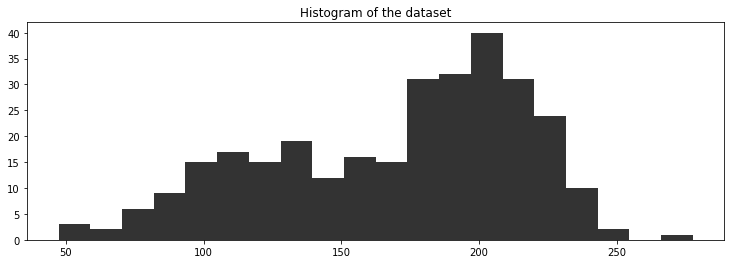

In [23]:
# Suppose we're given this dataset
plt.figure(figsize = (12.5, 4))
data = np.loadtxt("./mixture_data.csv", delimiter = ',')
plt.hist(data, bins = 20, color = 'k', histtype = 'stepfilled', alpha = 0.8)
plt.title('Histogram of the dataset')
plt.ylim([0, None])
print(data[:10], "...")

The data is bimodal: there are two peaks (one at 120 and the other near 200). 

This suggests that there may be two distinct "clusters" within the dataset. 

## Data Generating Process Hypothesis 
1. For each data point, assume with probability $p$ that it came from cluster 1. Otherwise, choose cluster 2. 
2. Draw a random variate from a normal distribution with parameters $\mu_i$ and $\sigma_i$ where $i$ is the cluster number we chose in step 1. 
3. Repeat for all points.

In this process, we don't know $p$ or the parameters $\mu_i$ or $\sigma_i$ and must infer them from the dataset. 

We denote the normal distributions $N_0$ and $N_1$ with means and standard deviations $\mu_0$/$mu_1$ and $\sigma_0$/$sigma_1$ respectively. 

A specific data point can be from $N_0$ or $N_1$ depending on the probability $p$. 



## Data Generation

In [24]:
import pymc3 as pm 
import theano.tensor as tt

In [25]:
with pm.Model() as model:
  p1 = pm.Uniform('p', 0, 1)        # p1 - probability of data point belonging to cluster 1 - is uniform 
  p2 = 1 - p1                       # p2 - probability of data point belonging to cluster 2 
  p = tt.stack([p1, p2])            # Combine the probabilities into a tensor PyMC3 can use

  # This is a categorical variable that denotes the cluster to which a data point belongs 
  # based on the values of p1 and p2. We initialise the assignment variable with a 
  # random integer between 0 and 1. 
  assignment = pm.Categorical(
      'assignment', p, shape = data.shape[0], testval = np.random.randint(0, 2, data.shape[0])
  )

In [26]:
print(f"Prior Assignment with p = {p1.tag.test_value:.2f}")
print(assignment.tag.test_value[:10])

Prior Assignment with p = 0.50
[0 0 1 0 1 0 1 0 1 1]


We need to specify priors on the means and standard deviations of the two clusters. 

We can assume that standard deviatons for both models are uniformly distributed from 0 - 100.

The means $\mu_1$ and $\mu_2$ can also be modeled as normal distributions themeselves with means of 190 and 120 and standard deviations of 10. 

We now add both of these probabilisitic variables to our model.

In [27]:
with model:
  # Two standard deviations - one for each cluster. 2-D variable means separate SD for each
  sds = pm.Uniform('sds', 0, 100, shape = 2)

  # The centers or means of the bimodal distribution are also distrbuted normally 
  centers = pm.Normal(
      'centers',
      mu = np.array([120, 190]), 
      sd = np.array([10, 10]), 
      shape = 2
  )

  # The center for the 1st and 2nd clusters 
  center_i = pm.Deterministic('center_i', centers[assignment])
  sd_i = pm.Deterministic('sd_i', sds[assignment])

  # Combine it with the observations 
  observations = pm.Normal('obs', mu = center_i, sd = sd_i, observed = data)

In [28]:
print(f"Random Assignments: {assignment.tag.test_value[:4]}...")
print(f"Assigned center:  {center_i.tag.test_value[:4]}...")
print(f"Assigned standard deviation: {sd_i.tag.test_value[:4]}")

Random Assignments: [0 0 1 0]...
Assigned center:  [120. 120. 190. 120.]...
Assigned standard deviation: [50. 50. 50. 50.]


## MCMC Sampling

We chose the Metropolis sampling method for all of our continuous variables
- $p$: the probability of a data point belonging to cluster 1.
- $sds$: the standard deviation of the normal distribution of the cluster
- $centers$: the mean of the normal distribution of the cluster

We use the `ElemwiseCategorical` method for the categorical variable. 

Using both sampling methods in `sample` means we can sample the posterior distribution using 25000 `iterations` and `step` defining the value of sampling of the discrete and continuous values.

In [29]:
with model:
  step1 = pm.Metropolis(vars = [p, sds, centers])
  step2 = pm.ElemwiseCategorical(vars = [assignment])
  trace = pm.sample(25000, step = [step1, step2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: ElemwiseCategorical is deprecated, switch to CategoricalGibbsMetropolis.
  This is separate from the ipykernel package so we can avoid doing imports until
Sequential sampling (2 chains in 1 job)
CompoundStep
>CompoundStep
>>Metropolis: [centers]
>>Metropolis: [sds]
>>Metropolis: [p]
>ElemwiseCategorical: [assignment]
100%|██████████| 25500/25500 [03:28<00:00, 122.10it/s]
The number of effective samples is smaller than 10% for some parameters.


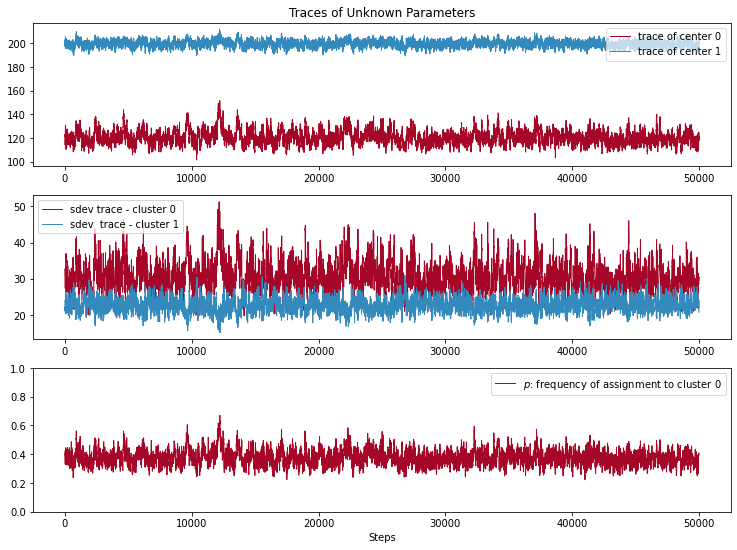

In [30]:
# trace contains a record of posterior samples of each parameter during the sampling
plt.figure(figsize = (12.5, 9))
plt.subplot(311)
lw = 1
center_trace = trace['centers']

# For coloring traces of different clusters  
colors = ['#348ABD', '#A60628'] if center_trace[-1, 0] > center_trace[-1, 1] else ['#A60628', '#348ABD']

# Plotting the values of mean_0 and mean_1 sampled at each step by Metropolis algorithm
plt.plot(center_trace[:, 0], label = 'trace of center 0', c = colors[0], lw = lw)
plt.plot(center_trace[:, 1], label = 'trace of center 1', c = colors[1], lw = lw)
plt.title('Traces of Unknown Parameters')
leg = plt.legend(loc = 'upper right')
leg.get_frame().set_alpha(0.7)

# Plotting the traces of standard deviations in the same way
plt.subplot(312)
std_trace = trace["sds"]
plt.plot(std_trace[:, 0], label = 'sdev trace - cluster 0', c = colors[0], lw = lw)
plt.plot(std_trace[:, 1], label = 'sdev  trace - cluster 1', c = colors[1], lw = lw)
plt.legend(loc = 'upper left')

# Plotting the traces of the probability of a given data plot belonging to cluster 1 
plt.subplot(313)
p_trace = trace['p']
plt.plot(p_trace, label = '$p$: frequency of assignment to cluster 0', color = colors[0], lw = lw)
plt.xlabel('Steps')
plt.ylim(0, 1)
plt.legend()

## Interpreting Trace 
- The traces for mean and standard deviation are different for both clusters. 
- The probability of a given point belonging to cluster one is very noisy, but is generally between 0.25 and 0.6. 
- Traces do converge, but not to a single point. Instead, they converge to a distribution of possible points. 
- We can't perform inference using the first few thousand points: they represent samples from regions that are likely far away from the typical set/region we're interested in. 
- Traces appear as a random walk around the parameter space. 

## More Sampling
We can continue sampling where we left off by passing the trace object to another sample statement. 

This can be useful wehn we want to investigate the effects of further convergence.

In [31]:
with model:
  trace = pm.sample(50000, step = [step1, step2], trace = trace)

Sequential sampling (2 chains in 1 job)
CompoundStep
>CompoundStep
>>Metropolis: [centers]
>>Metropolis: [sds]
>>Metropolis: [p]
>ElemwiseCategorical: [assignment]
100%|██████████| 50500/50500 [06:53<00:00, 122.05it/s]
The number of effective samples is smaller than 10% for some parameters.


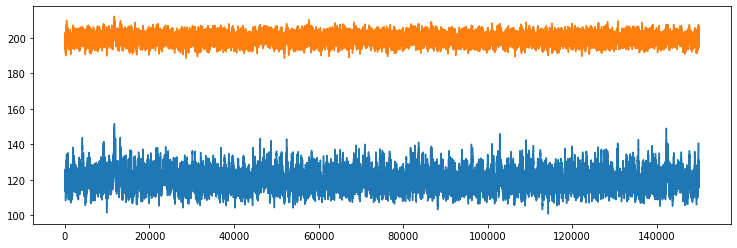

In [32]:
plt.plot(trace['centers'][:, 0])
plt.plot(trace['centers'][:, 1])

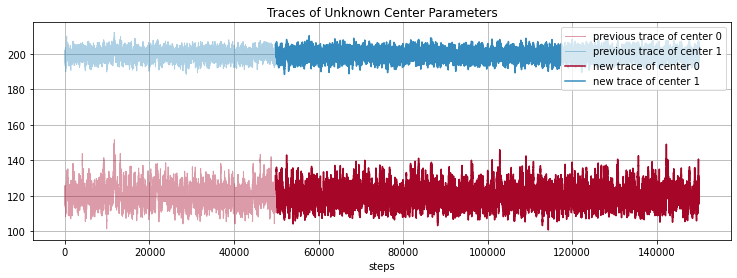

In [34]:
plt.figure(figsize = (12.5, 4))

cutoff_idx = 50000
prev_center_trace = trace['centers'][:cutoff_idx]
center_trace = trace['centers'][cutoff_idx:]

plt.plot(np.arange(cutoff_idx), prev_center_trace[:, 0], label = 'previous trace of center 0', 
         lw = lw, alpha = 0.4, c = colors[0])
plt.plot(np.arange(cutoff_idx), prev_center_trace[:, 1], label = 'previous trace of center 1', 
         lw = lw, alpha = 0.4, c = colors[1])

plt.plot(np.arange(cutoff_idx, len(trace['centers'])), center_trace[:, 0], 
         label = 'new trace of center 0', c = colors[0])
plt.plot(np.arange(cutoff_idx, len(trace['centers'])), center_trace[:, 1], 
         label = 'new trace of center 1', c = colors[1])

plt.title('Traces of Unknown Center Parameters')
leg = plt.legend(loc = 'upper right')
leg.get_frame().set_alpha(0.8)
plt.xlabel('steps')

plt.grid()

## Cluster Investigation

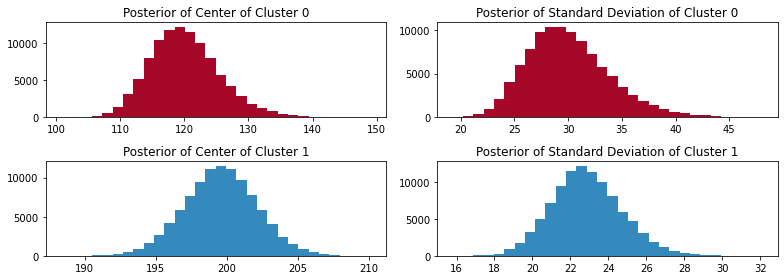

In [35]:
# We still need to identify clusters parameterized by center mu and sd
plt.figure(figsize = (11.0, 4))
std_trace = trace['sds'][cutoff_idx:]
prev_std_trace = trace['sds'][:cutoff_idx]

_i = [1, 2, 3, 4]               # Plot indices
for i in range(2):
  plt.subplot(2, 2, _i[2 * i])          # 
  plt.title(f'Posterior of Center of Cluster {i}')
  plt.hist(center_trace[:, i], color = colors[i], bins = 30, histtype = 'stepfilled')

  plt.subplot(2, 2, _i[2 * i + 1]) 
  plt.title(f'Posterior of Standard Deviation of Cluster {i}')
  plt.hist(std_trace[:, i], color = colors[i], bins = 30, histtype = 'stepfilled')

plt.tight_layout()

We have also derived the posterior distribution for the lables of the data point i.e. does it belong to cluster one or cluster 2? We can visualize the proportion of samples that have been labled with a particular class for the $i^{th}$ data point. 

Text(0.5, 1.0, 'Posterior lables of data points')

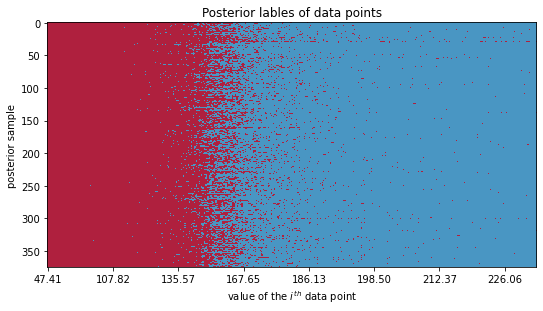

In [36]:
import matplotlib as mpl

plt.figure(figsize = (12.5, 4.5))
plt.cmap = mpl.colors.ListedColormap(colors)
plt.imshow(trace['assignment'][::400, np.argsort(data)], 
           cmap = plt.cmap, aspect = 0.4, alpha = 0.9)
plt.xticks(np.arange(0, data.shape[0], 40), ['%.2f' %s for s in np.sort(data)[::40]])
plt.ylabel('posterior sample')
plt.xlabel('value of the $i^{th}$ data point')
plt.title('Posterior lables of data points')

The most uncertainty about the "true" cluster of a data point is for data points between 150 an 170. A clearer diagram would display the frequency of eah data point belonging to labels 0 and 1.

Text(0.5, 0, 'Value of data point')

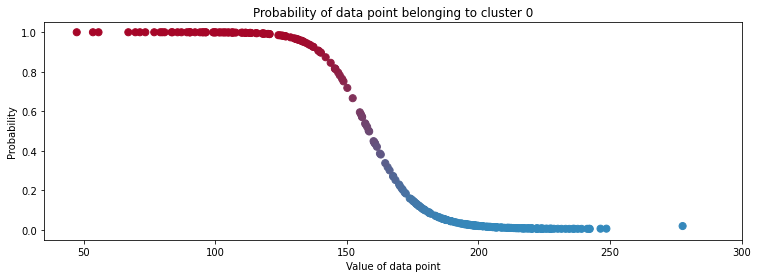

In [37]:
cmap = mpl.colors.LinearSegmentedColormap.from_list('BMH', colors)
assign_trace = trace['assignment']
plt.scatter(data, 1- assign_trace.mean(axis = 0), c = assign_trace.mean(axis = 0), 
            s = 50, cmap = cmap)
plt.ylim(-0.05, 1.05)
plt.xlim(35, 300)
plt.title('Probability of data point belonging to cluster 0')
plt.ylabel('Probability')
plt.xlabel('Value of data point')

Even though we modeled clusters using the normal distribution, we didn't get a single normal distribution that best fits the data. Rather, we got a distribution of values for normal parameters, and can now choose a single pair of values for the mean and variance. 

One quick way of doing this would be to calculate the mean of the posterior distributions.

Text(0.5, 1.0, 'Visualizing Clusters using Posterior-Mean Parameters')

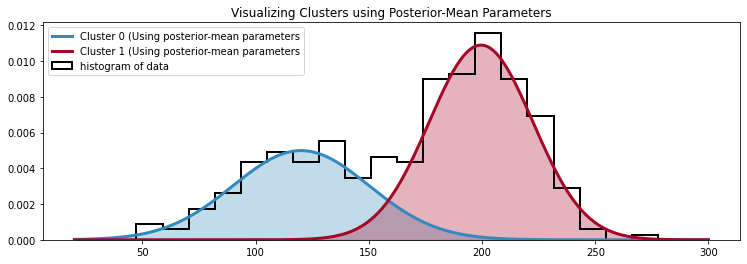

In [38]:
# Average over the normal density functions and use the mean of the posterior 
# distributions as chosen parameters 
norm = stats.norm 
x = np.linspace(20, 300, 500)       # Data points between 20 and 300 
posterior_center_means = center_trace.mean(axis = 0)      # Mean of normal_0 and normal_1
posterior_std_means = std_trace.mean(axis = 0)            # SD of normal_0 and normal_1 
posterior_p_mean = trace['p'].mean()                   

plt.hist(data, bins = 20, histtype = 'step', density = True, color = 'k', 
         lw = 2, label = 'histogram of data')

# We scale the probability of a data point belonging to a normal distribution 
# with mean ~120 and sd ~10 (Norm 0) by the average probability that any given
# data point belongs here
y = posterior_p_mean * norm.pdf(x, loc = posterior_center_means[0], scale = posterior_std_means[0])
plt.plot(x, y, label = 'Cluster 0 (Using posterior-mean parameters', lw = 3, 
         color = colors[1])
plt.fill_between(x, y, color = colors[1], alpha = 0.3)

# We do the same for a data point belonging to Norm 1 but this time scale by (1 - p)
y = (1 - posterior_p_mean) * norm.pdf(x, loc = posterior_center_means[1], scale = posterior_std_means[1]) 
plt.plot(x, y, label = 'Cluster 1 (Using posterior-mean parameters', lw = 3, 
         color = colors[0])
plt.fill_between(x, y, color = colors[0], alpha = 0.3)

plt.legend(loc = 'upper left')
plt.title('Visualizing Clusters using Posterior-Mean Parameters')

## Don't Mix Posterior Samples 

When performing Bayesian inference on multiple parameters, we need to remember that these parameters are related. 

The mean of the $i^{th}$ sample is usually correlated with the deviation of the sample sample, and the deviation of the second cluster will also be correlated with these parameters for the same sample. 

What this means is that we can't combine posterior samples $i$ with posterior samples $j$ in any kind of inference. 

This usually isn't a problem as long as we index all parameters' traces properly.

As an extreme example, consider sampling the posteriro distributions for `x` and `y` where $x + y = 10$. 

In this case, every value of `y` will depend on the value of `x` sampled from the posterior, so if we use $x_i$ in conjunction with $y_j$, we'll be going against the logic of our own posterior sampling.

In [39]:
import pymc3 as pm 

with pm.Model() as model:
  x = pm.Normal('x', mu = 4, tau = 10)
  y = pm.Deterministic('y', 10 - x)

  trace_2 = pm.sample(10000, pm.Metropolis())

Sequential sampling (2 chains in 1 job)
Metropolis: [x]
100%|██████████| 10500/10500 [00:01<00:00, 10319.57it/s]
The number of effective samples is smaller than 25% for some parameters.


Text(0.5, 1.0, 'Extreme case of dependence between unknowns')

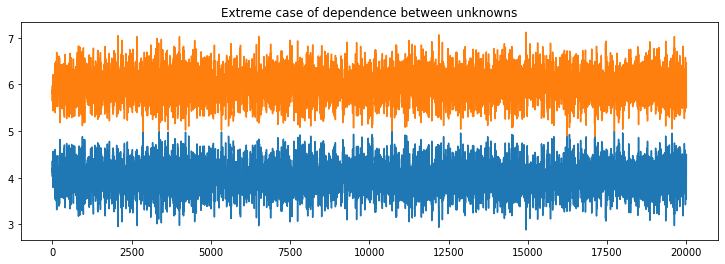

In [40]:
plt.plot(trace_2['x'])
plt.plot(trace_2['y'])
plt.title('Extreme case of dependence between unknowns')

## Returning to Cluster Prediction

Suppose we've obsevred a new data point $x = 175$ and we wish to label it with either cluster 0 or 1. 

The whole point of our Bayesian exercise was that we will now be able to compute the probability of this point belonging to a particular cluster. This is more intelligent than just assigning the point to the cluster with the closest posterior mean, as the standard deviations of the two clusters overlap. 

We denote the assignment of $x$ as $L_x$.

We are interested in $$P(L_x  = 1 | x = 175)$$

More specifically, we are interested to know if $P(L_x = 1 | x = 175) > P(L_x = 0 | x = 175)$ given our posterior means for parameters $\mu_1, \mu_2, \sigma_1, \sigma_2, p$. 

Using Bayes Theorem 
$$\frac{P(x = 175 | L_x = 1) \times P(L_x = 1)}{P(x = 175)} > \frac{P(x = 175 | L_x = 0) \times P(L_x = 0)}{P(x = 175}$$

Ignoring the denominator, 
$$P(x = 175 | L_x = 1) \times P(L_x = 1) > P(x = 175 | L_x = 0) \times P(L_x = 0)$$

In [41]:
norm_pdf = stats.norm.pdf 
p_trace = trace['p'][50000:]
prev_p_trace = trace['p'][:50000]
x = 175 

p_cluster_0 = (1 - p_trace) * norm_pdf(x, loc = center_trace[:, 0], scale = std_trace[:, 0])
p_cluster_1 = p_trace * norm_pdf(x, loc = center_trace[:, 1], scale = std_trace[:, 1])

p_is_cluster_1 = (p_cluster_1 > p_cluster_0).mean()
print(f"Probability of belonging to cluster 1: {p_is_cluster_1:4f}")

Probability of belonging to cluster 1: 0.987090


# Diagnosing Convergence 

## Autocorrelation
A measure of how related a series of numbers is with itself. That is, you find the correlation between a vector of numbers $x_t$ with a lagged version of itsef $x_{t-k}$.

$$R(k) = Corr(x_t, x_{t - k})$$

Consider two series 
$y_t \sim Normal(y_{t-1}, 1), y_0 = 0$

Which basically means $y$'s value at time $t$ is centered around the value of $y$ at time $t - 1$ with some variation. In other words, since the value of $y(t - 1)$ can be used to predict the value of $y(t)$, $y$ is autocorrelated.

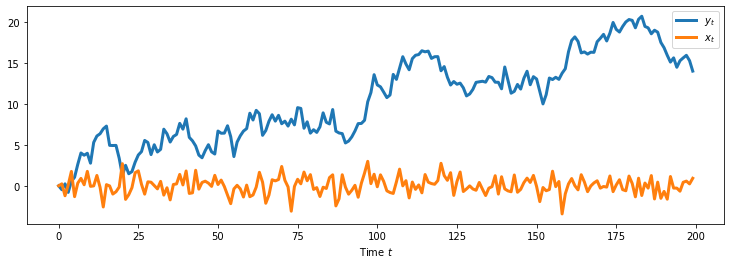

In [46]:
plt.figure(figsize = (12.5, 4))

import pymc3 as pm
x_t = np.random.normal(0, 1, 200)     # Mean 0, variance 1, 200 samples 
x_t[0] = 0
y_t = np.zeros(200)                   # Initialzie np array to store autocorrelation results

# y is autocorrelated - which basically means that the value at y_t at point i
# is normally distributed with mean y_t[i - 1] i.e. the previous value of y_t
for i in range(1, 200):
  y_t[i] = np.random.normal(y_t[i - 1], 1)

plt.plot(y_t, label = '$y_t$', lw = 3)
plt.plot(x_t, label = '$x_t$', lw = 3)
plt.xlabel("Time $t$")
plt.legend()

One way to think about autocorrelation: if I know the position of the series at time $s$ can it help me know where I am at time $t$? 

For the series $x$, this isn't true: $x$ is just a bunch of random numbers drawn from the normal distribution. 

But $y$ is autocorrelated which means the value of $y(t)$ is close to the value of $y(t - 1)$.  

As the lag $k$ between points in an autocorrelated series increases, the autocorrelation also decreases. 

Text(0.5, 1.0, 'Autocorrelation Plot of $y_t$ and $x_t$ for different $k$ lag')

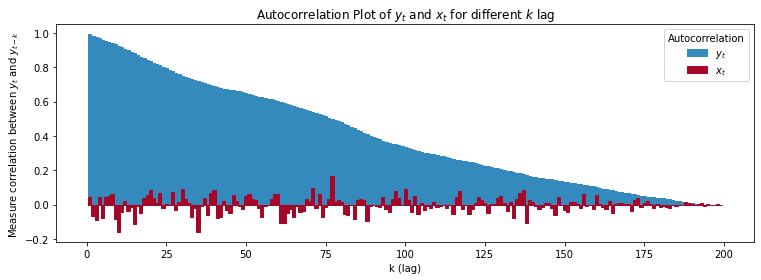

In [47]:
# Visualizing relationship between lag and autocorrelation
def autocorr(x):
  result = np.correlate(x, x, mode = 'full')
  result = result / np.max(result)
  return result[result.size // 2:]

colors = ['#348ABD', '#A60628', '#7A68A6']
x = np.arange(1, 200)                       # 

plt.bar(x, autocorr(y_t)[1:], width = 1, label = '$y_t$', edgecolor = colors[0], color = colors[0])
plt.bar(x, autocorr(x_t)[1:], width = 1, label = '$x_t$', edgecolor = colors[1], color = colors[1])

plt.legend(title = 'Autocorrelation')
plt.ylabel('Measure correlation between $y_t$ and $y_{t - k}$')
plt.xlabel('k (lag)')
plt.title('Autocorrelation Plot of $y_t$ and $x_t$ for different $k$ lag')

Autocorrelation is relevant to MCMC because samples returned by posterior sampling in MCMC will exhibit autocorrelation. 

Any chain that doesn't explore the parameter space well will exhibit high autocorrelation - it will meander around the parameter space rather than settling down. 

**This does not mean that converged MCMC has low autocorrelation**. 

## Thinning

Samples returned by MCMC can have very high autocorrelation. This can be a problem because many post-processing algorithms require samples to be independent of each other. This can be partially reduced by returning only the $n^{th}$ consecutive sample from the posterior. 

This process is known as thinning.

Text(0.5, 1.0, 'Autocorrelation of $y_t$ with variable thinning')

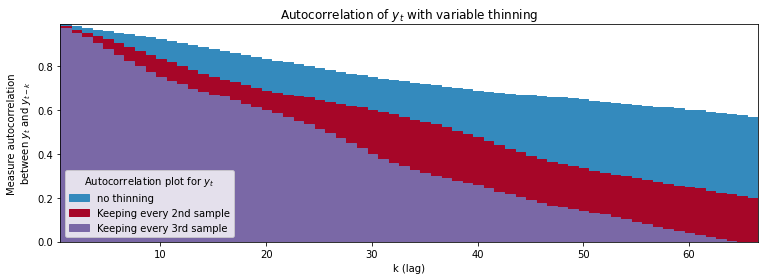

In [48]:
max_x = 200 // 3 + 1 
x = np.arange(1, max_x)

plt.bar(x, autocorr(y_t)[1:max_x], edgecolor = colors[0], label = 'no thinning', color = colors[0], width = 1)
plt.bar(x, autocorr(y_t[::2])[1:max_x], edgecolor = colors[1], label = 'Keeping every 2nd sample', 
        color = colors[1], width = 1)
plt.bar(x, autocorr(y_t[::3])[1:max_x], edgecolor = colors[2], label = 'Keeping every 3rd sample', width = 1, 
        color = colors[2])

plt.autoscale(tight = True)
plt.legend(title = 'Autocorrelation plot for $y_t$', loc = 'lower left')
plt.ylabel('Measure autocorrelation\n between $y_t$ and $y_{t - k}$')
plt.xlabel('k (lag)')
plt.title('Autocorrelation of $y_t$ with variable thinning')

Typical thinning of more than 10 is often not necessary. There will always be some autocorrelation in some samples, regardless of how much thinning is done. 

As long as the autocorrelation tends to 0, MCMC is fine.